
# Mínimos e máximos de funcións escalares


In [1]:
import time
print(' Última execución  ', time.asctime() )

 Última execución   Sat Mar 15 23:56:26 2025



## Obxectivos

* Lembrar o concepto de mínimo e máximo dunha función real e como se calcula.

* Introducir a expansión de Taylor de segunda orde das funcións escalares e a matriz de Hesse.
 
* Comentar a condición suficiente.

* Relación entre os mínimos e os máximos e os autovalores da matriz de Hesse.
 
* Exemplos de cálculos de mínimos e máximos.

* Introducir o concepto de mínimos condicionais.
 
* Introducir o método dos multiplicadores de Lagrange.


*Nota*

Para que este notebook funcione en colab, precisamos <a href = "https://www.dropbox.com/scl/fi/wwz2w43kqj0s38gm87roj/graph_utils.py?rlkey=rppkwu9tmbnnsojezzj69p1r0&dl=1"> graph_utils.py </a>. Podes descargalo premendo na ligazón, e subilo a colab:


<img src="https://www.dropbox.com/scl/fi/b35vcated0f9lwrw4jy01/colab_upload.jpg?rlkey=l1ag15r0ovkg2dsefze117k1y&raw=1" width=200 align="center" />

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'


## Desenvolvemento de Taylor de $\bf 2^{\rm \bf a}$ orde de funcións escalares.

###  Revisión dos conceptos de extremos, mínimos e máximos.

 Para as funcións reais, $f(x)$, tiñamos definido como mínimo local, ese valor $x_0$ do dominio tal que nos valores dun intervalo ao seu redor, de ancho $h$, a función é maior ou igual a en $x_0$. De xeito semellante definimos o máximo local.

 Chamamos mínimo local:

$$
x \in [x_0 - h, x_0 + h] \Rightarrow f(x) \ge f(x_0)
$$

 Chamamos máximo local:

$$
x \in [x_0 - h, x_0 + h] \Rightarrow f(x) \le f(x_0)
$$

 $x_0$ é un mínimo global se todo o valor da función en todos os puntos do dominio é maior que en $x_0$, e do mesmo xeito para o máximo.



*Exemplo* : A seguinte función real, $f(x) = x^2+2x-1$, presenta un mínimo local en $x_0 = -1$.

 Lembras como calculabamos os mínimos ou máximos? Ambos cumprían a condición de que a súa pendente fose cero e o signo da segunda derivada dicíanos, se era positivo, era un mínimo, e se era negativo, era un máximo.

 Condición de extremos: $f'(x_0) = 0$

 Condición de máximo: $f''(x_0) < 0$ e de mínimo $f''(x_0) >0$


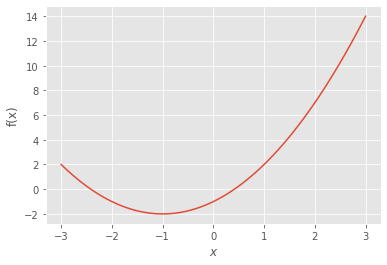

In [3]:
fun = lambda x: x**2 + 2*x - 1
gf.fun1d(fun);


Neste caso, con $f(x) = x^2 + 2x - 1$, a condición de extremo: $f'(x_0) = 2 x_0 + 2 = 0$, o que resulta en $x_0 = -1$.

 Este é un mínimo, xa que $f''(x_0) = 2$



Se lembras, podiamos obter os mínimos e os máximos grazas a que esta función é diferenciable, admite expansión de Taylor de segunda orde.

 A expansión de Taylor de segunda orde dunha función real, $f(x)$, é:

$$
f(x_0 + h) \simeq f(x_0) + f'(x_0) h + \frac{1}{2} f''(x_0) h^2
$$

 onde $h$ é un tamaño "pequeno".

 Lembra tamén que a condición suficiente para que unha función real teña unha expansión de Taylor de segunda orde nun valor $x_0$ é que a súa segunda derivada nun entorno dese valor sexa continua.

 Interpretando $f'(x_0)$ como a pendente, vemos que para que a función non cambie o valor ao redor de $x_0$, a súa pendente ten que ser nula.

 E entón, o segundo sumando, $\frac{1}{2} f''(x_0) h^2$, é positivo ou negativo dependendo do signo da segunda derivada, $f''(x_0)$. De aí a condición de mínimo ou máximo.



### Igualdade de derivadas segundas cruzadas

 Antes de abordar a expansión de Taylor das funcións escalares de segunda orde, vexamos este importante teorema (**teorema de Schwarz**):

 *Teorema* : Sexa $f({\bf x})$ unha función escalar de $\mathbb{R}^n \to \mathbb{R}$, se as segundas derivadas son continuas nunha bola centrada nun punto, $ { \bf x}_0$, é certo que as derivadas cruzadas son iguais:

$$
\frac{\partial^2 f({\bf x}_0)}{\partial x_i \partial x_j} = \frac{\partial^2 f({\bf x}_0)}{\partial x_j \partial x_i}
$$ 

con $i \ne j, \; i = 1, \dots, n; \, j = 1, \dots, n$.


<img src="https://www.dropbox.com/scl/fi/qcjrlo6eipu4ijp12atm0/GG2tezVWcAAfQRR.png?rlkey=1ta447kf9wsbsj37ivojmoo54&raw=1" width=400 align="center" />


## Expansión de Taylor de segunda orde de funcións escalares

 Sexa unha función escalar, $f({\bf x})$, de $\mathbb{R}^n \to \mathbb{R}$, con derivadas segundas continuas nun punto interior, ${\bf x} _0 $, do dominio, a función pódese aproximar nun punto "preto", ${\bf x}$, separado de ${\bf x}_0$ por un vector "pequeno" ${\bf v}$ , pola súa **expansión de Taylor de segunda orde** :

$$
f({\bf x}_0 + {\bf v}) \simeq f({\bf x}_0) + \sum_{i=1}^n \frac{\partial f({\bf x}_0)}{\partial x_i} v_i + \frac{1}{2}\sum_{i= 1}^n  \sum_{j=1}^n \frac{\partial^2 f({\bf x}_0)}{ \partial x_i \partial x_j} v_i v_j
$$



Que podemos reescribir en forma matricial:

$$
f({\bf x}_0 + {\bf v}) \simeq f({\bf x}_0) + \nabla f({\bf x}_0) \, {\bf v} + \frac{1}{2} {\bf v}^T \, {\bf H}({\bf x}_0) \, {\bf v}
$$

 onde ${\bf H}({\bf x}_0)$ é a **matriz de Hesse** valorada en ${\bf x}_0$, para a cal as compoñentes son as segundas derivadas,

$$
{\bf H}_{ij}({\bf x}_0) = \frac{\partial^2 f({\bf x}_0)}{ \partial x_i \partial x_j}
$$

 e onde ${\bf v}$, é o vector en forma de columna, e ${\bf v}^T$ en forma de fila.



*Pregunta* : é a Hessiana unha matriz simétrica?

*Pregunta* : está fóra do alcance deste curso, pero podes tentalo, como cres que sería a expansión de Taylor de segunda orde dunha función vectorial?

*Fíxate* : hai polo menos unha función vectorial para a que coñeces a súa expansión de Taylor de 2ª orde. O da traxectoria dun móbil no tempo!

$$
{\bf r}(t_0 + \Delta t) \simeq {\bf r}(t_0) + {\bf r}'(t_0) \Delta t + \frac{1}{2} {\bf r}''(t_0) (\Delta t)^2
$$



**Exemplo** : Calcula a expansión de Taylor da función escalar, $f(x, y) = 2x^2 + 4 y^2$, no punto $(0, 0)$.



Os diferentes sumandos da expansión de Taylor son:

 $$
 f({\bf x}_0) = 0
 $$

 O gradiente é

 $$
 \nabla f ({\bf x}) = (4 x , 8 y)
 $$

 Valorado na orixe é:

 $$
 \nabla f ({\bf x}_0) = (0, 0)
 $$

 A matriz hessiana é:

$$
{\bf H}({\bf x}) = \left( \begin{array}{cc} 4 & 0 \\ 0 & 8\end{array} \right)
$$


 que é independente do punto, ${\bf x}$.

 Entón a expansión de Taylor con respecto ao punto ${\bf x}_0$ é:

$$
f({\bf x}_0 + {\bf v}) = \frac{1}{2} (v_x, v_y) \, \left( \begin{array}{cc} 4 & 0 \\ 0 & 8\end{array} \right) \, \left( \begin{array}{c} v_x \\ v_y \end{array} \right) =  2 v^2_x + 4 v^2_y 
$$



Observa a gráfica da función e os seus conxuntos de nivel.

 *Pregunta* : Podes determinar se hai un mínimo ou un máximo local e onde?

 É obvio, non?


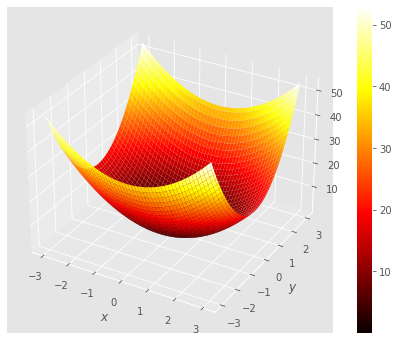

In [4]:
fun = lambda x, y : 2*x*x + 4*y*y
gf.graph(fun);

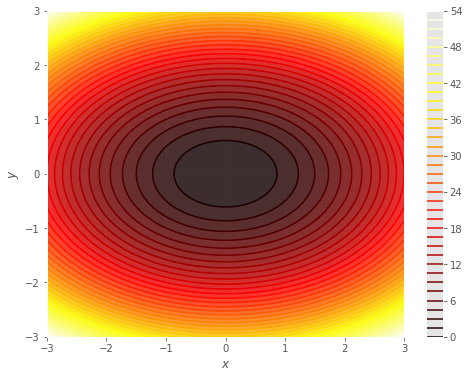

In [5]:
gf.contour(fun, contours = 40);


## Mínimos e máximos das funcións escalares

 Como nunha dimensión, chamaremos un punto **extremo** ou **crítico** , ${\bf x}_0$, dunha función escalar diferenciable, $f({\bf x})$, de $\mathbb{R}^n \to \mathbb{R}$, a aqueles puntos do dominio para os cales gradiente é cero, $\nabla f ({\bf x}_0) = {\bf 0}$.

 No exemplo anterior, a función escalar $f(x, y) = 2x^2 + 4y^2$ ten un extremo en $(0, 0)$.

 Observa a gráfica e os conxuntos de nivel da seguinte función, $f(x, y) = 2x^2 - 4y^2$. Podes verificar que o punto $(0, 0)$ é un extremo, ten un gradiente cero (o gradiente é $\nabla f(x, y) = (4x, -8 y)$ ), pero non o é nin máximo nin mínimo, é un **punto de sela** . Definimos como tal, o punto extremo dende o cal a función ascende nunha dirección e descende noutra.

 *Explora* e modifica o vector ${\bf v}$ superposto aos conxuntos de nivel e observa como dependendo da dirección de ${\bf v}$ a función finalmente ascende ou descende.


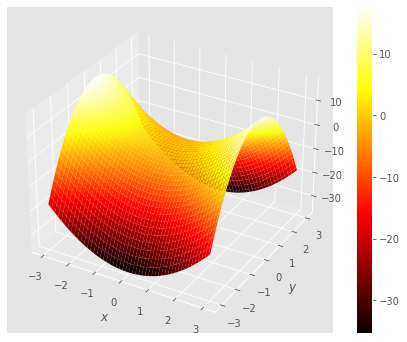

In [6]:
fun = lambda x, y: 2*x*x - 4*y*y 
gf.graph(fun);

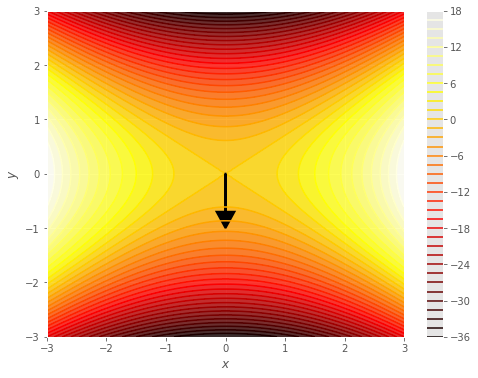

In [7]:
x0, y0 =  0., 0.
vx, vy =  0., -1.
gf.contour(fun, contours = 40);
gf.arrow(x0, y0, vx, vy);


*Exercicio* : Da a expansión de Taylor de segunda orde da función $f(x, y) = 2 x^2 - 4 y^2$ no punto de sela $(0, 0)$.


A función en ${\bf x}_0$ é:

$$
f({\bf x}_0) = 0
$$

 O gradiente é nulo:

$$
\nabla f(x, y) = (4 x, -8y) \Rightarrow \nabla f({\bf x}_0) = (0, 0)
$$

 A matriz hessiana é:

$$
{\bf H}({\bf x}) = \left( \begin{array}{cc} 4 & 0 \\ 0 & -8\end{array} \right)
$$

 que é independente do punto, ${\bf x}$.

 Entón a expansión de Taylor con respecto ao punto ${\bf x}_0$ é:
 
$$
f({\bf x}_0 + {\bf v}) =  \frac{1}{2} (v_x, v_y) \, \left( \begin{array}{cc} 4 & 0 \\ 0 & - 8\end{array} \right) \, \left( \begin{array}{c} v_x \\ v_y \end{array} \right) =  2 v^2_x - 4 v^2_y 
$$

Onde vemos que se avanzamos *só* na dirección $x$ a función ascende, mentres que se avanzamos *só* na dirección $y$ descende. É polo tanto un punto de sela.


### Clasificación de puntos extremos

 Os puntos extremos dunha función escalar serán máximos, mínimos ou puntos de sela, dependendo do valor do termo da matriz de Hesse da súa expansión de Taylor:

 $$
 \frac{1}{2} {\bf v}^T \, {\bf H}({\bf x}_0) \, {\bf v}
 $$

 Se para cada vector ${\bf v}$ o termo é positivo, entón é un mínimo, a función sempre ascende.

 Se é negativo, é un máximo, a función sempre descende. E se, segundo o vector, é positivo ou negativo, é un punto de sela, a función ascende nunha dirección e descende noutra.



Considera o caso dunha función escalar $f(x, y)$ de $\mathbb{R}^2 \to \mathbb{R}$, na que a matriz de Hesse é diagonal e os elementos da diagonal son $ \lambda_1, \lambda_2$ nun punto extremo ${\bf x_0}$.

 O termo do Hessiano no desenvolvemento de Taylor sería:

$$
\frac{1}{2} (v_x, v_y) \, \left( \begin{array}{cc} \lambda_1 & 0 \\ 0 & \lambda_2\end{array} \right) \, \left( \begin{array}{c} v_x \\ v_y \end{array} \right) = \frac{1}{2}\left( \lambda_1 v^2_x + \lambda_2 v^2_y \right)
$$

 Podemos ver que se os dous valores son positivos, $\lambda_1 > 0, \lambda_2 >0$, o punto será un mínimo, para calquera vector $(v_x, v_y)$ a función ascende.

 Se ambos son negativos, $\lambda_1 < 0, \lambda_2 < 0$, é un máximo, a función sempre descende.

 Se un é negativo e o outro positivo, dependerá do vector $(v_x, v_y)$, en certas direccións a función aumenta e noutras diminúe, entón será un punto de sela.



*Exercicio* : Calcula a matriz de Hesse para o punto extremo $(0, 0)$ da función, $f(x, y) = 3 x^2 + 3y^2 - 2xy$.

 *Observa* a gráfica desta función e os seus conxuntos de nivel.



O gradiente é:
    
$$
\nabla f(x, y) = (6 x - 2y, 6y - 2x)
$$

 E a matriz Hessiana:

$$
{\bf H}(x, y) = \left( \begin{array}{cc} 6 & -2 \\ -2 & 6\end{array}\right)
$$

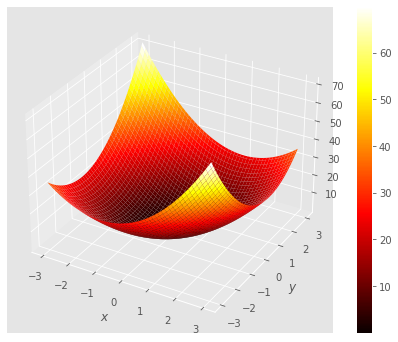

In [8]:
fun = lambda x, y: 3*x*x + 3*y*y -2*x*y
gf.graph(fun);

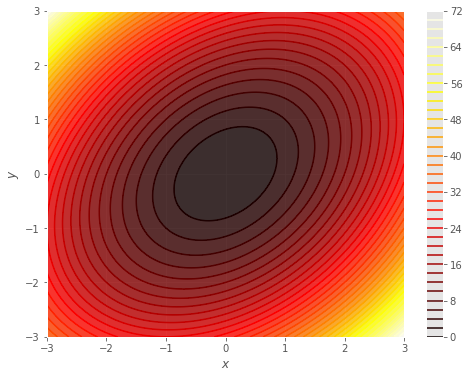

In [9]:
gf.contour(fun, contours=40);

¿E se a Hesiana no punto extremo, ${\bf x}_0$, non é diagonal?

 Sabemos que a matriz de Hesse, xa que as segundas derivadas son continuas, é simétrica, e tamén sabemos que as matrices simétricas son diagonalizables.
 
 Polo tanto, existe unha base ortonormal, $\{{\bf e}'_1, {\bf e}'_2 \}$, na que a matriz de Hesse é diagonal, ${\bf H}'({\bf x}_0)$ con auto-valores $\lambda'_1, \lambda'_2$. A relación entre ambos vén dada pola matriz de cambio de bases ortonormal ${\bf U}$.

$$
{\bf H}({\bf x}_0) = {\bf U} \, {\bf H}' ({\bf x}_0) \, {\bf U}^T
$$
donde:

$$
{\bf U} { \bf U}^T = {\bf U}^T { \bf U}  = {\bf I}
$$



Podemos expresar o vector ${\bf v}$ na base dos autovectores (denotámolo como ${\bf v}'$), cambiando:

$$
{\bf v} = {\bf U} \, {\bf v}'
$$

 Podemos entón reescribir o termo Hessiano da expansión de Taylor en base aos autovectores:
 
$$
\frac{1}{2}{\bf v}^T \, {\bf H}({\bf x}_0) \, {\bf v} = \frac{1}{2}{\bf v}'^T {\bf U}^T \, {\bf U} {\bf H}'({\bf x_0}){\bf U}^T \, {\bf U} {\bf v}'= \frac{1}{2} {\bf v}'^T \, {\bf H}'({\bf x_0}) \,{\bf v}'
$$




É dicir, o termo hessiano da expansión de Taylor non depende da base na que o calculemos.

 Se expresamos o vector $(v_x, v_y)$ na base dos autovectores, é dicir, $(v'_x, v'_y)$, temos

$$
\frac{1}{2} {\bf v'}^T \, {\bf H}'({\bf x}_0) \, {\bf v}' =   \frac{1}{2} (v'_x, v'_y) \, \left( \begin{array}{cc} \lambda'_1 & 0 \\ 0 & \lambda'_2\end{array} \right) \, \left( \begin{array}{c} v'_x \\ v'_y \end{array} \right) = 
\frac{1}{2} \left( \lambda'_1 v'^2_x + \lambda'_2 v'^2_y \right)
$$

 E polo tanto, se os dous autovalores da Hessiana son positivos, $\lambda'_1 > 0, \lambda'_2 >0$, o punto extremo ${\bf x}_0$ é mínimo; se ambos son negativos $\lambda'_2 >0$, o punto extremo ${\bf x}_0$ é mínimo; se os dous son negativos , é un máximo, e se un é positivo e o outro negativo, é un punto de sela.


No exemplo anterior, a Hessiana era:

$$
{\bf H}(x, y) = \left( \begin{array}{cc} 6 & -2 \\ -2 & 6\end{array}\right)
$$

Calculamos os seus autovalores:

$$
\left| \begin{array}{cc} (6-\lambda) & -2 \\ -2 & (6-\lambda) \end{array}\right| = (6-\lambda)^2 -4 = 0
$$

 Isto é:

$$
(6-\lambda) = \pm 2 \; \Rightarrow \, \lambda = 6 \pm 2 \; \Rightarrow \, \lambda'_1 = 4, \; \lambda'_2 = 8
$$

O punto extremo é mínimo porque ambos autovalores son positivos.


Calculemos os seus autovectores ${\bf e}'_1 = (u_x, u_y), \; {\bf e}'_2 = (v_x, v_y)$, que lembramos que deben ser ortonormais:

$$
 \left( \begin{array}{cc} 6 & -2 \\ -2 & 6\end{array}\right) \, \left( \begin{array}{c} u_x \\ u_y \end{array}\right) = 4 \left( \begin{array}{c} u_x \\ u_y \end{array} \right)
$$

 Isto é:

$$
6 u_x - 2 u_y =  4 u_x \; \Rightarrow 2u_x =  2u_y \; \Rightarrow u_x = u_y \
$$

 Como o vector ten norma unitaria:

$$
{\bf e}'_1 = \left( \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right)
$$

Mientres que para o segundo autovector:

$$
 \left( \begin{array}{cc} 6 & -2 \\ -2 & 6\end{array}\right) \, \left( \begin{array}{c} v_x \\ v_y \end{array}\right) = 8 \left( \begin{array}{c} v_x \\ v_y \end{array} \right)
$$

 Isto é:

$$
6 v_x - 2 v_y =  8 v_x \; \Rightarrow  -2 v_x =  2 v_y \; \Rightarrow \, v_x = - v_y
$$

Como teñen que ser ortonormais:

$$
{\bf e}'_2 = \left( -\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right)
$$



Na seguinte cela debuxamos os conxuntos de nivel da función e no punto extremo debuxamos os autovectores.

 *Pregunta* : Podes dar a relación entre os autovectores, os autovalores e os conxuntos de nivel da expansión de Taylor arredor dun extremo?


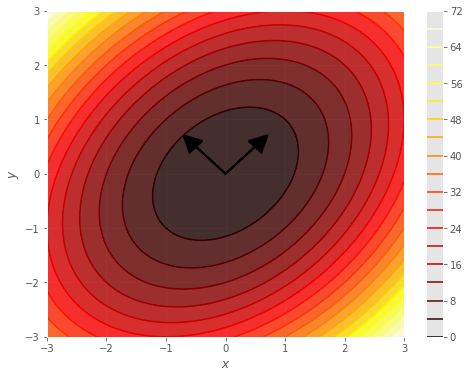

In [10]:
x0, y0 =              0.,            0.
ux, uy =  1./np.sqrt(2.), 1./np.sqrt(2.)
vx, vy = -1./np.sqrt(2.), 1./np.sqrt(2.)
gf.contour(fun, contours = 20)
gf.arrow(x0, y0, ux, uy)
gf.arrow(x0, y0, vx, vy);


A expansión de Taylor de segunda orde arredor dun punto extremo *sempre* ten eixes de simetría, que veñen dados polos autovectores.

 A ecuación dos conxuntos de nivel de valor $c$ na expansión de Taylor de segunda orde nun punto extremo, $(x'_0, y'_0)$, na base dos autovectores, vén dada por:

$$
f(x'_0 + v'_x, \, y'_0 + v'_y) \simeq f(x'_0, y'_0) + \frac{1}{2}\left( \lambda'_1 v'^2_x + \lambda'_2 v'^2_y \right) = c
$$

 Os conxuntos de nivel son *elipses* se é un mínimo ou máximo, ou *hipérbolas* se é un punto de sela, respecto dos seus eixes de simetría.

 Os autovalores cuantifican a curvatura en cada un dos eixes de simetría. A curvatura é máis pronunciada canto maior sexa o autovalor.

 Ou tamén podemos asocialos cos eixes das elipses dos conxuntos de nivel. O eixe da elipse é maior para os autovalores máis pequenos.



### Mínimos e máximos para funcións escalares de varias dimensións

 Sexa a función escalar, $f({\bf x})$, de $\mathbb{R}^n \to \mathbb{R}$, un punto ${\bf x}_0$ é **extremo** ou **crítico** se o seu gradiente é nulo, $\nabla f ({\bf x}_0) = {\bf 0}$.

 Dicimos que un punto extremo é **un mínimo local** se todos os puntos dentro dunha bola de tamaño $\delta$, centrada en ${\bf x}_0$ teñen un valor da función menor ou igual ao de ${\bf x} _0 $

 $$
 {\bf x} \; / \, \parallel {\bf x} - {\bf x}_0 \parallel \lt \delta \, \Rightarrow f({\bf x}) \ge f({\bf x}_0)
 $$

 E do mesmo xeito, será un **máximo local** se:

 $$
 {\bf x} \; / \, \parallel {\bf x} - {\bf x}_0 \parallel \lt \delta \, \Rightarrow f({\bf x}) \le f({\bf x}_0)
 $$

 Finalmente, é **un punto de sela** se en cada bóla centrada en ${\bf x}_0$, hai puntos dentro da bola para os cales o valor da función é maior e outros menores que o valor no punto crítico.

 O punto extremo é un mínimo, se todos os **autovalores** , ${\lambda_i, \, i=1, \dots, n }$, da súa **matriz hessiana** , ${\bf H}({\bf x_0})$, son positivos; é un máximo se todos son negativos; e é un punto de sela se uns son negativos e outros positivos.



Considera agora unha función escalar $f(x, y)$ e o punto extremo, $(x_0, y_0)$, o determinante da matriz Hessiana é negativo. Podes clasificar o extremo, é mínimo, máximo, punto de sela? E se o determinante é positivo?


Un caso particular do anterior acontece para funcións escalares de dúas dimensións, $f(x,y)$.
Se temos como matriz Hessiana:

$$
H = \begin{pmatrix}
H_{xx} & H_{xy} \\
H_{yx} & H_{yy} \\
\end{pmatrix}
$$

onde
- $H_{xx} = \frac{\partial^2 f}{\partial x^2}$
- $H_{xy} = \frac{\partial^2 f}{\partial x \partial y}$ (que é igual a $H_{yx}$ se $f$ é suficientemente suave, segundo o teorema de Schwarz)
- $H_{yy} = \frac{\partial^2 f}{\partial y^2}$

Para analizar a natureza do punto crítico $(x_0, y_0)$, para o cal $\nabla f (x_0,y_0)=0$, necesitamos avaliar a matriz Hessiana nese punto e considerar dous valores clave

1. **O determinante da matriz Hessiana** en $(x_0, y_0)$, denotado como $\text{det}(H)$, que é $H_{xx}H_{yy} - H_{xy}^2$.
2. $H_{xx}$

A natureza do punto crítico determinase da seguinte maneira:

-  **Se $\text{det}(H) > 0$ e $H_{xx} > 0$**, a función ten un mínimo local en $(x_0, y_0)$.
- **Se $\text{det}(H) > 0$ e $H_{xx} < 0$**, a función ten un máximo local en $(x_0, y_0)$.
- **Se $\text{det}(H) < 0$**, o punto é un punto de sela.
- **Se $\text{det}(H) = 0$**, a proba é inconclusiva.

O motivo é que $\text{det}(H)=\lambda_1\lambda_2$, é dicir, o produto dos autovalores. Se o determinante é negativo sabemos que o signo dos autovalores é o mesmo, se é positivo ten que ser igual. O motivo de usar $H_{xx}$ como referencia vén do [criterio de Sylvester](https://en.wikipedia.org/wiki/Sylvester%27s_criterion).

<img src="https://pbs.twimg.com/media/GHRXJC5WwAAEYpS?format=jpg&name=small" width=400 align="center" />


## Mínimos e máximos condicionais

 Considera o caso de que queremos calcular os extremos dunha función escalar, $f({\bf x})$, pero non en todo o seu dominio, senón nunha parte del. Neste caso fálase de **extremos condicionados** .

 Por exemplo, sexa a función: $f(x, y) = x^2 - y^2$, e queremos calcular os seus extremos no círculo de raio unitario, é dicir, nos puntos que satisfan $x^ 2 + y ^2 = $1.

 A seguinte cela debuxa os conxuntos de nivel da función e do círculo. Como podes ver, parametrizamos a circunferencia en función de $t$ que toma os valores en $[0, 2 \pi)$.

- Podes identificar os puntos extremos da función ao longo da circunferencia?


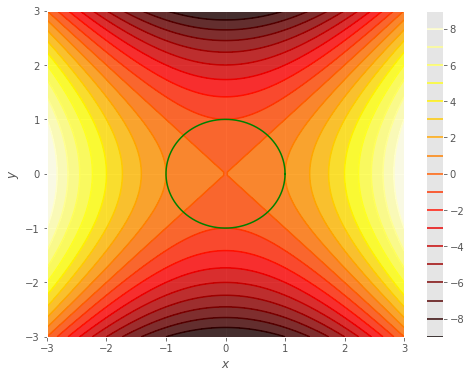

In [11]:
f   = lambda x, y : x*x - y*y
xt  = lambda t    : np.cos(t)
yt  = lambda t    : np.sin(t)
gf.contour(f);
gf.line2d(xt, yt, trange=(0., 2*np.pi, 100), color = 'green',newfig = False);


Imos debuxar o gradiente da función nun punto determinado, que como sabemos nos indica a dirección na que a función experimenta o máximo cambio.

$$
f(x, y) = x^2 - y^2 \, \Rightarrow \nabla f(x, y) = (2x,- 2y)
$$


 *Considera* primeiro o valor $t = 3 \pi/4$, que nos dá o punto $\left( -1/\sqrt{2}, 1/\sqrt{2} \right)$.

 Se quixeramos dirixirnos nunha dirección na que a función aumentase sen saír do círculo, só poderiamos movernos cara á esquerda (como se a pendiente tirase dun coche que só puidese moverse polo círculo), pero ata cando?

 *Considera* agora o valor $t = \pi$, este é o punto $(-1, 0)$. O gradiente alí é radial, se queremos permanecer no círculo, entón non hai dirección que nos permita facelo e que á súa vez nos permita aumentar o valor da función. Acadamos o máximo condicional da función.


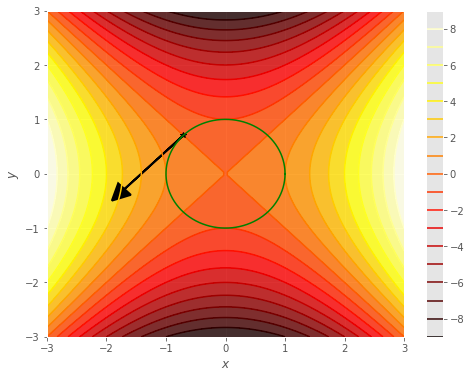

In [12]:
t0  = 3.*np.pi/4
fpx = lambda x, y :  2*x
fpy = lambda x, y : -2*y
x0, y0 = xt(t0), yt(t0)
gf.contour(f);
gf.dot(x0, y0)
gf.line2d(xt, yt, trange=(0., 2*np.pi, 100), color = 'green',newfig = False);
gf.arrow(x0, y0, fpx(x0, y0), fpy(x0, y0), color = 'black'); # nabla f


Se observas, o extremo da función coincide no punto para o cal o gradiente é *ortogonal* ao círculo.

 Podemos dar a circunferencia como o conxunto de nivel dunha función, (con $c= 1$), simplemente:

 $$
 g(x, y) = x^2 + y^2 = c
 $$

 e sabemos que o gradiente desta función será sempre *ortogonal* ao conxunto de nivel.

 Entón o punto extremo, $(x_0, y_0)$, os dous gradientes, o da función e o da condición de conxunto de nivel, deben ser paralelos, é dicir, proporcionais:

 $$
 \nabla f (x_0, y_0) = \lambda \nabla g(x_0, y_0)
 $$

 onde $\lambda$ é un valor de proporcionalidade.


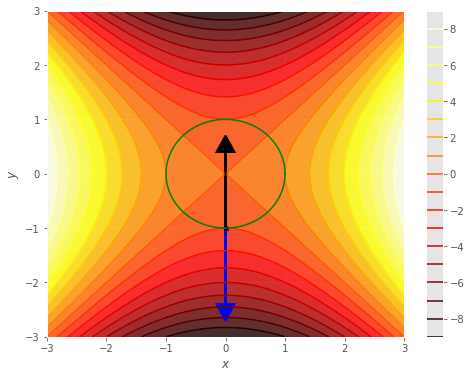

In [13]:
t0  = 3.*np.pi/2.
x0, y0 = xt(t0), yt(t0)
g   = lambda x, y : x*x + y*y
gpx = lambda x, y : 2*x
gpy = lambda x, y : 2*y
gf.contour(f);
gf.dot(x0, y0)
gf.line2d(xt, yt, trange=(0., 2*np.pi, 100), color = 'green',newfig = False);
gf.arrow(x0, y0, fpx(x0, y0), fpy(x0, y0), color = 'black'); # nabla f3
gf.arrow(x0, y0, gpx(x0, y0), gpy(x0, y0), color = 'blue'); # nabla g


### Multiplicadores de Lagrange

 Sexa unha función escalar, $f({\bf x})$, o extremo, ${\bf x_0}$ desa función, onde ${\bf x}_0$ pertence aos conxuntos de nivel dados por $g( {\bf x}) = c$, cumpre que:

 $$
 \nabla f ({\bf x}_0) = \lambda \nabla g ({\bf x}_0)
 $$

 onde $\lambda$ é un factor de proporcionalidade, chamado **multiplicador de Lagrange** .



*Exercicio* : Calcula os extremos condicionais da función $f(x, y)= x^2 - y^2$ no círculo de raio unitario

 $$
 \nabla f (x, y) = (2x, -2y)
 $$



Podemos dar a condición de:

 $$
 g(x, y) = x^2 + y^2 = 1
 $$

 A condición de Lagrange:

$$
\nabla f (x_0, y_0) = \lambda \nabla g (x_0, y_0) \; \Rightarrow \, (2x_0, -2y_0) = \lambda (2x_0, 2y_0)
$$

 Da primeira condición $2 x_0 = \lambda 2 x_0$, obtemos $\lambda = 1$; pero para que se cumpra a segunda ecuación $-2 y_0 = \lambda 2 y_0$, como $\lambda = 1$, entón $y_0 = 0$.

 Só hai dous puntos no círculo con $y_0 = 0$ que son $(-1, 0)$ e $(1, 0)$. En ambos, cúmprese a condición de Lagrange. Son polo tanto extremos condicionados.

 Da segunda condición $2 y_0 = - \lambda 2 y_0$, obtemos $\lambda = -1$; pero para o primeiro que se cumpra neste caso, $2 x_0 = 2 \lambda x_0$, como $\lambda = -1$, entón $x_0 = 0$.

 Só hai dous puntos no círculo con $x_0 = 0$ que son: $(0, 1)$ e $(0, -1)$. Tamén son extremos condicionados

 A función en $(-1, 0)$ e $(1, 0)$ vale $1$. Mentres que en $(0, 1)$ e $(0, -1)$ vale $-1$. Os dous primeiros son máximos condicionais e os dous últimos son mínimos condicionais.

 *Verifica* : que é correcta na cela anterior, colocando $t = 0, \pi/2, \pi, 3 \pi/2$, e observe como os gradientes se aliñan e coinciden cos valores máximo e mínimo que o célula pode levar.función na circunferencia.


Unha alternativa, válida neste caso pero complicada noutros, pode ser construir

$$
h(x) = f(x,y(x))= x^2-(1-x^2) = 4x^2-1
$$

e búscar os puntos extremos de $h(x)$. Se o facemos, $h'(x)=4x=0 \Rightarrow x=0$. O que nos da os puntos $(0, 1)$ e $(0, -1)$. Se construímos $h(y)=f(y(x),x)$ e a minimizamos chegamos aos outros dous: $(-1, 0)$ e $(1, 0)$.


## Aínda hai máis!

###  Joseph Louis Lagrange

 Lagrange foi un dos grandes matemáticos e físicos dos séculos XVIII e principios do XIX. Era un home da súa época, un italiano do norte que percorreu a Europa do seu tempo, e que foi profesor na gran escola "École Polytechnique", recentemente fundada por Napoleón. Debémoslle moitas contribucións, entre elas a reformulación da mecánica newtoniana. Aquí está a súa entrada na Wikipedia: [JL Lagrange](https://en.wikipedia.org/wiki/Joseph-Louis_Lagrange)

<img src="https://www.biografiasyvidas.com/biografia/l/fotos/lagrange.jpg" width=300 align="center" />




### Principio de mínima acción

 Os máximos e os mínimos xogan un papel fundamental na Física. De feito, a mecánica clásica (e tamén moderna) pode formularse en función do [principio de mínima acción](https://en.wikipedia.org/wiki/Principle_of_least_action) , que nos di que a dinámica dun sistema físico está rexida pola busca da menor acción, que se define matemáticamente como a integral dun termo chamado **Lagrangiano** .

 Este principio foi declarado por primeira vez polo físico francés Maupertius no século XVIII, e na súa versión moderna, no século XX polo físico e profesor estadounidense Richard **Feynman** . Aquí tes unha ligazón a unha das súas famosas [clases](http://www.feynmanlectures.caltech.edu/II_19.html) e á súa entrada na Wikipedia, [Feynman](https://en.wikipedia.org/wiki/Richard_Feynman)

<img src="https://visit.cern/sites/default/files/inline-images/postcard_formula_500.png" width=300 align="center" />



### O método dos mínimos cadrados

 Os mínimos e os máximos tamén xogan un papel fundamental na estimación de parámetros e observables.

 Probablemente utilizastes o método dos mínimos cadrados nas técnicas experimentais de laboratorio para axustar os datos a unha liña recta.

 Como sabedes, a Natureza ten un comportamento probabilístico e as nosas medicións *sempre* están suxeitas a incertezas.

 No método dos mínimos cadrados, a distancia (cadrada) dos valores medidos calcúlase contra o valor dunha función de hipótese, por exemplo a liña, que depende de varios parámetros (no caso da liña, os parámetros son os pendente, $a$, e o limiar na orixe, $b$). Estimamos estes parámetros e as súas incertezas calculando o mínimo da suma das distancias ao cadrado. Chamamos a esta función, $\chi^2$, que no caso de axustarse a unha liña, é unha función escalar de dúas variables, $a, b$.

 É dicir, determinamos os parámetros do noso modelo como aqueles que fan que a suma das distancias cadradas dos datos con respecto ao modelo sexa o máis pequena posible.



No caso da liña recta:

 Sexa unha mostra de datos ${(x_i, y_u), \; i = 1, \dots, n}$, con erros $\sigma_i = \sigma$,

 que se distribúen ao longo dunha liña recta. Sabemos que este ten dous parámetros, $a$, a pendente e $b$, o limiar na orixe.

 $$
 y(x \, | \, a, b) = a \, x + b
 $$

 e construímos a función escalar $\chi^2(a, b)$ como:

 $$
 \chi^2(a, b) = \frac{1}{n-2} \, \sum _{i=1}^n \frac{(y_i - y(x_i | a, b))^2} { \sigma^2} \
 = \frac{1}{n-2} \, \sum _{i=1}^n \frac{(y_i - a \, x_i - b)^2}{\sigma^2}
 $$

 onde o termo denominador, $n-2$, corresponde aos graos de liberdade que son o número de datos, $n$, menos o número de parámetros, 2 neste caso (para $a, b$).

 E estimamos os parámetros $\hat{a}, \hat{b}$ como os que minimizan o $\chi^2$

 $$
 (\hat{a}, \hat{b}) \;\;\; / \;\; \chi^2(\hat{a}, \hat{b}) = \mathrm{min}(\chi^2(a, b))
 $$



As seguintes celas mostran o axuste a unha liña de datos simulada.

 Primeiro xeramos unha mostra de datos aleatorios ${ (x_i, y_i), \; i= 1, \dots, n }$, ao longo dunha liña recta, cada un coa mesma incerteza $\sigma_i = \sigma$. Despois estimamos os parámetros, $(\hat{a}, \hat{b})$, utilizando o método dos mínimos cadrados.

 Na figura debúxanse os puntos co seu erro, a recta verdadeira e a recta estimada.

 *Explorar* Cambia o número de puntos ou os parámetros verdadeiros para ver como cambia o axuste.


In [14]:
import scipy.stats    as stats
import scipy.optimize as optimize

def experiment(a, b, sigma, npoints, xrange = (0, 10)):
    x0, xf = xrange
    xs = x0 + (xf - x0)*stats.uniform.rvs(size = npoints)
    ys = a * xs + b + stats.norm.rvs(scale = sigma, size = npoints)
    return (xs, ys)

def lsq_fit(xs, ys, sigma, aguess =1, bguess = 0.):
    fres = lambda pars: (ys - pars[0]*xs - pars[1])/sigma
    x, _ = optimize.leastsq(fres, (aguess, bguess))
    return x

def chisq(a, b):
    chi2 = 0.
    for i in range(len(ys)):
        dx = (ys[i] - a*xs[i] -b)/sigma
        chi2 += dx*dx
    return chi2/(len(ys)-2)

a =  1.0100056970185305 b =  0.07970534401131574


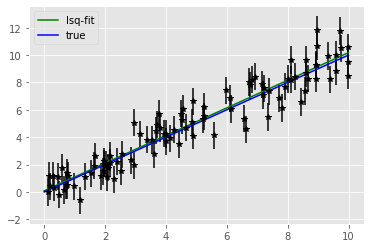

In [15]:
atrue, btrue, sigma, npoints = 1., 0., 1., 100
xrange = (0, 10)
xs, ys     = experiment(atrue, btrue, sigma, npoints, xrange = xrange)
ahat, bhat = lsq_fit(xs, ys, sigma) 
plt.errorbar(xs, ys, yerr=sigma, fmt='*', color = 'black')
ts = np.linspace(*xrange, 100)
plt.plot(ts, bhat  + ahat *ts, color = 'green', label = 'lsq-fit')
plt.plot(ts, btrue + atrue*ts, color = 'blue' , label = 'true')
print('a = ', ahat, 'b = ', bhat)
plt.legend();


Na seguinte cela, debuxamos os conxuntos de nivel da función $\chi^2(a, b)$.

 Podes ver para este experimento que os valores estimados dannos o mínimo de $\chi^2$ e tamén podes ver os conxuntos de nivel en diferentes valores, que, estando preto do mínimo, deben ser elipses e que nos dan unha estimación da incerteza dos parámetros $a$, $b$. O valor verdadeiro é o punto negro, mentres que o valor estimado é o punto vermello.


chisq  0.9474221256860829


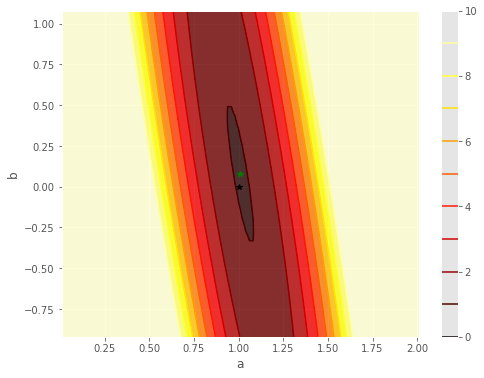

In [16]:
xchi =  chisq(ahat, bhat)
print('chisq ', xchi)
gf.contour(chisq, contours = 10, xrange = (ahat - 1, ahat + 1, 100), zlim = (0, 10),
           yrange = (bhat - 1, bhat +1, 100))
gf.dot(ahat, bhat, color = 'green'); gf.dot(atrue, btrue, color = 'black');
ax = plt.gca(); ax.set_xlabel('a'), ax.set_ylabel('b');


### As redes neuronais

 As redes neuronais son algoritmos matemáticos que *aprenden* a identificar patróns e clasificar mostras. O concepto leva aí desde mediados do século pasado, pero comezou a despegar desde $\sim$2010. Por exemplo, algo máis dunha década Google desenvolveu unha poderosa rede neuronal que distinguía as imaxes de gatos e cans. Desde entón as redes neuronais xa forman parate das nas nosas vidas.

 As redes neuronais toman o seu nome pola súa semellanza co noso sistema nervioso.

 Unha rede está formada por neuronas que están dispostas en capas. A figura da seguinte cela mostra un esquema dunha rede neuronal. Cada neurona ten un conxunto de entradas e unha única saída. Matemáticamente, cada neurona é unha función escalar, $\mathbb{R}^n \to \mathbb{R}$, onde $n$ é o número de entradas. A última capa da rede adoita ser unha única neurona e a súa saída é a resposta da rede. Matemáticamente, toda a rede é unha función escalar $\mathbb{R}^N \to \mathbb{R}$, onde $N$ é o número de entradas na primeira capa.

 Nestes vídeos podes atopar unha sinxela introdución ás redes neuronais [[>]](https://www.youtube.com/watch?v=aircAruvnKk) e aos seus métodos de adestramento [[>]](https://www.youtube.com/watch?v=IHZwWFHWa-w)


**Esquema dunha rede neuronal**

 As neuronas da primeira capa reciben os datos do mundo "exterior" e a neurona da última capa dá a resposta da rede.

<img src="./imgs/NN.png" width="400"/>

 Podemos considerar as capas intermedias *ocultas* .



A función escalar da neurona adoita ser un sigmoide.

 O sigmoide ten como parámetros un vector n-dimensional, ${\bf a}$, e un escalar, $b$.

 A súa forma é a seguinte:

 $$
 u( {\bf x} \, | \, {\bf a}, b ) = \frac{1}{1 + e^{-{\bf ax} - b}}
 $$

 Ten en conta que é unha función escalar $\mathbb{R}^n \to \mathbb{R}$ e que o seu valor está incluído no intervalo $[0, 1]$



*Explorar:* modifica o coeficiente $a$ na seguinte cela e mira como cambia a resposta do sigmoide.


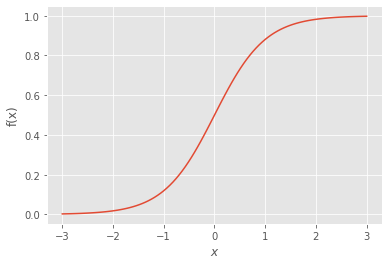

In [17]:
a, b = 2., 0
f = lambda x: 1/(1+np.exp(-a*x - b))
gf.fun1d(f);


**Como funcionan as redes neuronais?**

 A través do adestramento, é dicir, minimizando unha función escalar que chamamos erro.

 Consideremos o caso da rede neuronal que distingue imaxes de cans e gatos.

 Podemos matematizar a imaxe dándoa como un conxunto de píxeles (como se a imaxe fose un mosaico e cada mosaico un *píxel* ), e o valor de cada píxel correspondería, por exemplo, a un valor de escala de grises se a imaxe está en branco e negro. Polo tanto, convertimos a imaxe nun vector, ${\bf x}$, que será a entrada para a nosa rede.

 A rede terá varias capas con varias neuronas, por exemplo capas $L$, con neuronas $K$ en cada capa, e rematará cunha neurona final. Isto dará un valor entre $[0, 1]$, 0 corresponderá á imaxe dun gato e 1 á do can.

 A rede neuronal é polo tanto en si mesma unha función escalar que, a partir da imaxe inicial ${\bf x}$, dános unha única resposta $y({\bf x} | {\bf a}^{lk}, b ^ {lk})$, onde ${\bf a}^{lk}, b^{lk}$ son os parámetros da neurona na capa $l$ e na posición $k$ dentro desa capa. A resposta da rede neuronal é, polo tanto, unha función escalar $\mathbb{R}^N \to \mathbb{R}$, sendo $N$ o número de píxeles das nosas imaxes.



Construímos unha función de erro a partir dunha mostra de imaxes de cans e gatos ${ {\bf x}_i, \; i = 1, \dots, M}$, onde $M$ é un número moi grande, e a partir da resposta correcta para cada imaxe  $\{ y_i, \; i = 1, \dots, M \}$, onde $y_i$ será 0 cando a imaxe sexa dun gato e 1 dun can, coa seguinte expresión:

 $$
 E({\bf a}^{lk}, b^{lk}) = \frac{1}{MQ} \, \sum _{i=1}^M (y_i - y({\bf x}_i | {\bf a}^{lk}, b^{lk}))^2
 $$

 A función de erro é unha función escalar $\mathbb{R}^Q \to \mathbb{R}$, onde $Q$ é o número total de parámetros de todas as neuronas.

 Ten en conta que se a rede sempre acerta, a función de erro sería 0.

 No método dos mínimos cadrados, estimamos os parámetros, $(\hat{a}, \hat{b})$ minimizando a función $\chi^2(a,b)$, agora determinaremos os parámetros do neuronas, minimizando a función de erro. É dicir, fixaremos os parámetros das neuronas a aqueles cos que a rede comete os menores erros posibles na mostra coa que a adestramos.

 $$
 (\hat{\bf{a}}^{lk}, \hat{b}^{lk}) \;\;\; / \;\; E(\hat{\bf{a}}^{lk}, \hat{b}^{lk}) = \mathrm{min}(E({\bf a}^{lk}, b^{lk} ))
 $$

 No exemplo de axuste de mínimos cadrados, a función $\chi^2(a, b)$ dependía de dous parámetros, e podíamos calculalos analíticamente, pero agora a nosa función de erro $E({\bf a}^{lk}, b^{lk})$ ten parámetros $Q$, que poden ser un número moi grande.



Sería imposible calcular o mínimo analiticamente, pero enxeñeiros, físicos e matemáticos puideron desenvolver unha serie de métodos computacionais moi potentes cos que estimar os parámetros das neuronas minimizando a función de erro. E baséanse en calcular **grandes** e aplicar **a regra da cadea** !

 Aquí tedes un vídeo [[&gt;]](https://www.youtube.com/watch?v=IHZwWFHWa-w) que o explica.

 Unha vez que a rede estea "adestrada" ou "aprendeu" (é dicir, minimizamos a súa función de erro), poderemos amosarlle outras fotos de gatos e cans e para cada un deles, predecirá para o noso asombro se son cans ou gatos. Sexa agora unha imaxe co vector ${\bf x}$, a resposta da rede virá dada por $y({\bf x} \, | \, \hat{{\bf a}}^{lk }, \hat{b}^{lk})$



**E isto ten que ver coa Física?**

 Unha morea! Actualmente hai poucas análises en Física de Partículas, por exemplo, onde non se utiliza unha rede neuronal ou un método similar.

 Utilízanse para identificar se unha partícula é un electrón ou un muón (o seu irmán máis pesado). Ou se hai un bosón de Higgs nunha interacción ou non. Para decidir se unha interacción é relevante ou ordinaria.

 Xa podes imaxinar que as redes neuronais están detrás dalgunhas aplicacións como Facebook, Instagram, Spotify, TikTok e todos os xenios matemáticos que intentan predicir os teus gustos na rede.

 Se queres aprender máis sobre as redes neuronais, podes ler este [libro en liña](http://neuralnetworksanddeeplearning.com/index.html) e podes experimentar co módulo de Python [scikit-learn](https://scikit-learn.org/stable/) .


A seguinte imaxe amosa un evento do detector LHCb, no que traballamos no IGFAE. Empregamos diferentes redes neuronais para diferentes aspectos da análise destes eventos, como a identificación das partículas que o compoñen.

<img src="https://cds.cern.ch/record/2151262/files/LHCb7.png" width="800"/>


**Isto é todo por agora!**



## Apéndices

 Algo máis complicado!

 *Exercicio* : Usa Python e os métodos do módulo scipy para calcular os extremos da función:

 $$
 f(x, y) = \frac{x - y}{ 2 x^2 + 8 y^2 + 3}
 $$

 Comeza debuxando a función e as súas curvas de nivel!


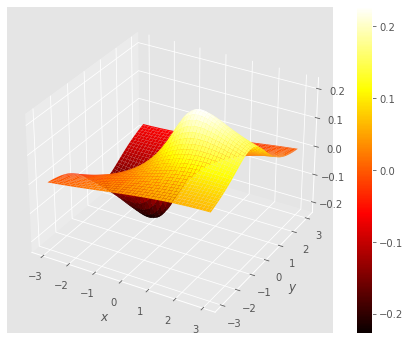

In [18]:
fun = lambda x, y: (x-y)/(2*x*x + 8*y*y +3)
gf.graph(fun);

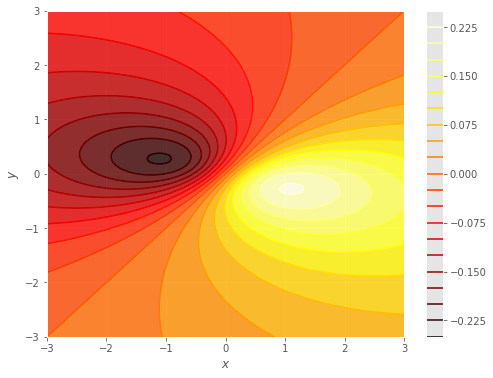

In [19]:
gf.contour(fun);


Dos conxuntos de nivel observamos que hai un mínimo arredor de $(-1, 0)$ e un máximo preto de $(1, 0)$, e que os eixes de simetría nos extremos coinciden cos eixes de coordenadas.

 Neste exercicio é imposible calcular os puntos extremos analíticamente, e temos que utilizar métodos numéricos en Python.

 Nas celas seguintes, primeiro calculamos numericamente o punto mínimo e máximo.

 Despois empregaremos o cálculo simbólico para calcular as derivadas parciais e segundas, e despois avaliaremos a matriz de Hesse nos puntos extremos.

 Finalmente calcularemos numericamente os autovalores e autovectores da matriz de Hesse, e verificaremos que son un máximo e un mínimo.


In [20]:
import scipy.optimize as optimize
import scipy.linalg   as linalg
fun = lambda x : (x[0]-x[1])/(2*x[0]*x[0] + 8*x[1]*x[1] + 3)
res1 = optimize.minimize(fun, (-1, 0))
x0, y0 = res1.x
print('punto mínimo ', x0, y0)
fun = lambda x : -(x[0]-x[1])/(2*x[0]*x[0] + 8*x[1]*x[1] + 3)
res2 = optimize.minimize(fun, (1, 0))
x1, y1 = res2.x
print('punto máximo ', x1, y1)

punto mínimo  -1.0954920902489502 0.2738621986560991
punto máximo  1.0954920606202636 -0.27386221675122946


In [21]:
import sympy
x, y = sympy.symbols('x y')
fx = sympy.diff((x-y)/(2*x*x+8*y*y+3), x)
fy = sympy.diff((x-y)/(2*x*x+8*y*y+3), y)
print('fx ', fx)
print('fy ', fy)

fx  -4*x*(x - y)/(2*x**2 + 8*y**2 + 3)**2 + 1/(2*x**2 + 8*y**2 + 3)
fy  -16*y*(x - y)/(2*x**2 + 8*y**2 + 3)**2 - 1/(2*x**2 + 8*y**2 + 3)


In [22]:
fxx = sympy.diff(fx, x)
fxy = sympy.diff(fx, y)
fyy = sympy.diff(fy, y)
fyx = sympy.diff(fy, x)
print('fxx ', fxx)
print('fxy ', fxy)
print('fyx ', fyx)
print('fyy ', fyy)

fxx  32*x**2*(x - y)/(2*x**2 + 8*y**2 + 3)**3 - 8*x/(2*x**2 + 8*y**2 + 3)**2 - 4*(x - y)/(2*x**2 + 8*y**2 + 3)**2
fxy  128*x*y*(x - y)/(2*x**2 + 8*y**2 + 3)**3 + 4*x/(2*x**2 + 8*y**2 + 3)**2 - 16*y/(2*x**2 + 8*y**2 + 3)**2
fyx  128*x*y*(x - y)/(2*x**2 + 8*y**2 + 3)**3 + 4*x/(2*x**2 + 8*y**2 + 3)**2 - 16*y/(2*x**2 + 8*y**2 + 3)**2
fyy  512*y**2*(x - y)/(2*x**2 + 8*y**2 + 3)**3 + 32*y/(2*x**2 + 8*y**2 + 3)**2 - 16*(x - y)/(2*x**2 + 8*y**2 + 3)**2


In [23]:
print('punto ', x0, y0)
hxx = fxx.subs([(x, x0), (y, y0)])
hxy = fxy.subs([(x, x0), (y, y0)])
hyx = fyx.subs([(x, x0), (y, y0)])
hyy = fyy.subs([(x, x0), (y, y0)])
h   = np.array([[float(hxx), float(hxy)], [float(hyx), float(hyy)]])
print('hessiana ', h)
eigvals, eigvecs = linalg.eig(h)
print('autovalores', eigvals)
print('autovector 1 :', eigvecs[:, 0])
print('autovector 2 :', eigvecs[:, 1])

punto  -1.0954920902489502 0.2738621986560991
hessiana  [[1.52129395e-01 5.62777899e-06]
 [5.62777899e-06 6.08558515e-01]]
autovalores [0.15212939+0.j 0.60855852+0.j]
autovector 1 : [-1.00000000e+00  1.23300174e-05]
autovector 2 : [-1.23300174e-05 -1.00000000e+00]


In [24]:
print('punto ', x1, y1)
hxx = fxx.subs([(x, x1), (y, y1)])
hxy = fxy.subs([(x, x1), (y, y1)])
hyx = fyx.subs([(x, x1), (y, y1)])
hyy = fyy.subs([(x, x1), (y, y1)])
h   = np.array([[float(hxx), float(hxy)], [float(hyx), float(hyy)]])
print('hessiana ', h)
eigvals, eigvecs = linalg.eig(h)
print('autovalores', eigvals)
print('autovector 1 :', eigvecs[:, 0])
print('autovector 2 :', eigvecs[:, 1])

punto  1.0954920606202636 -0.27386221675122946
hessiana  [[-1.52129403e-01 -5.63252983e-06]
 [-5.63252983e-06 -6.08558504e-01]]
autovalores [-0.1521294+0.j -0.6085585+0.j]
autovector 1 : [ 1.00000000e+00 -1.23404266e-05]
autovector 2 : [1.23404266e-05 1.00000000e+00]
